# Comparing Model Resolution

This is a simple example to show how to plot the model bathymetry. It uses cartopy, and the recently developed 0.1° topography.

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import IPython.display

netcdf_index loaded.


/home/157/amh157/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [5]:
# Grabbing tenth degree data from our latest run. These are output monthly at the moment.
u01 = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','u',n=1).isel(st_ocean=0).isel(time=0)
v01 = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','v',n=1).isel(st_ocean=0).isel(time=0)
lons01 = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','geolon_c',n=1).isel(time=0)
lats01 = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','geolat_c',n=1).isel(time=0)
uv01 = np.sqrt(u01**2 + v01**2)
IPython.display.clear_output()

In [9]:
# Grabbing quarter degree data from our latest run. These are output annually at the moment.
u025 = cc.get_nc_variable('025deg_jra55_ryf_spinup7','ocean.nc','u',n=1).isel(st_ocean=0).isel(time=0)
v025 = cc.get_nc_variable('025deg_jra55_ryf_spinup7','ocean.nc','v',n=1).isel(st_ocean=0).isel(time=0)
lons025 = cc.get_nc_variable('025deg_jra55_ryf_spinup7','ocean_grid.nc','geolon_c',n=1).isel(time=0)
lats025 = cc.get_nc_variable('025deg_jra55_ryf_spinup7','ocean_grid.nc','geolat_c',n=1).isel(time=0)
uv025 = np.sqrt(u025**2 + v025**2)
IPython.display.clear_output()

In [10]:
# Grabbing one degree data from our latest run. These are output annually at the moment.
u1 = cc.get_nc_variable('1deg_jra55v13_ryf8485_spinup_A','ocean.nc','u',n=1).isel(st_ocean=0).isel(time=0)
v1 = cc.get_nc_variable('1deg_jra55v13_ryf8485_spinup_A','ocean.nc','v',n=1).isel(st_ocean=0).isel(time=0)
lons1 = cc.get_nc_variable('1deg_jra55v13_ryf8485_spinup_A','ocean_grid.nc','geolon_c',n=1).isel(time=0)
lats1 = cc.get_nc_variable('1deg_jra55v13_ryf8485_spinup_A','ocean_grid.nc','geolat_c',n=1).isel(time=0)
uv1 = np.sqrt(u1**2 + v1**2)
IPython.display.clear_output()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1539: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


Text(0.5,1,'(c) ACCESS-OM2-01')

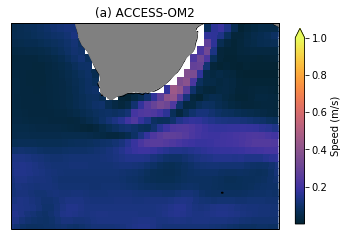

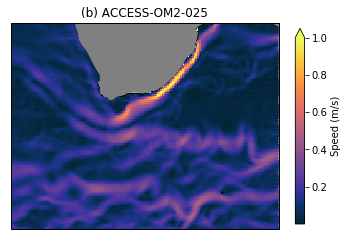

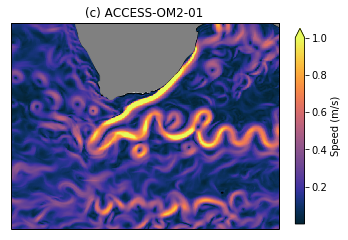

In [20]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=25))
ax.set_extent([5, 45, -50, -25])
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons1, lats1, uv1, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(a) ACCESS-OM2')


plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=25))
ax.set_extent([5, 45, -50, -25])
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons025, lats025, uv025, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(b) ACCESS-OM2-025')

plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=25))
ax.set_extent([5, 45, -50, -25])
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons01, lats01, uv01, cmap=cm.cm.thermal, 
               vmax=1, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Speed (m/s)',extend='max')
plt.title('(c) ACCESS-OM2-01')